<a href="https://colab.research.google.com/github/AlexKrempasky117/ANPR_CODE_1/blob/main/ANPR_Krempasky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 49.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


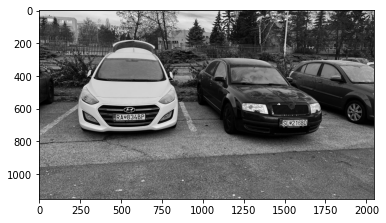

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# from skimage import morphology
# if torch.cuda.is_available():
#     device=torch.device("cuda:0")
#     print("Training on GPU... Ready for HyperJump...")
# else:
#     device = torch.device("cpu")
#     print("Training on CPU... May the force be with you...")
    
img = cv2.imread("skola4.jpg")
#resizing zmena rozlisenia
# image = imutils.resize(img, width=2048)
#2skuska ina funkcia
# resized = cv2.resize(img, (1048,1100), interpolation=cv2.INTER_CUBIC)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

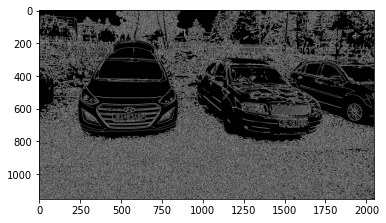

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 100) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None

for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[647, 634]],

       [[646, 667]],

       [[470, 671]],

       [[471, 637]]], dtype=int32)

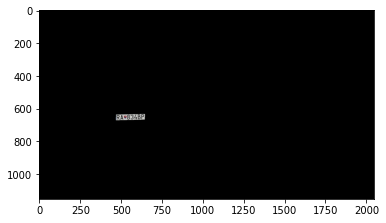

In [ ]:
mask = np.zeros(gray.shape, np.uint8)

new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
# new_image = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

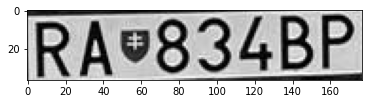

In [ ]:
# (x,y) = np.where(mask==255)
# (x1, y1) = (np.min(x), np.min(y))
# (x2, y2) = (np.max(x), np.max(y))
# cropped_image = gray[x1:x2+1, y1:y2+1]

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2, y1:y2]



plt.imshow(cropped_image)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


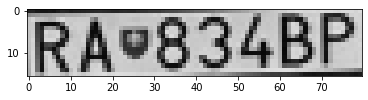

In [ ]:
# resized = cv2.resize(cropped_image, (100,200), interpolation=cv2.INTER_CUBIC)
resized = imutils.resize(cropped_image, width=80)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

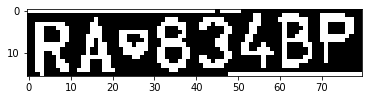

In [ ]:
adthresh2 = cv2.adaptiveThreshold(resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 9)
#skusit neskor s adaptivnym asi to je tak lepsie v pripade urcitych
plt.imshow(cv2.cvtColor(adthresh2, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['sk'])
result2= reader.readtext(adthresh2)

result2

[([[0, 0], [80, 0], [80, 16], [0, 16]], "RA'834BP", 0.5636286707658887)]

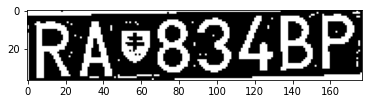

In [ ]:
adthresh = cv2.adaptiveThreshold(cropped_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 9)
#skusit neskor s adaptivnym asi to je tak lepsie v pripade urcitych
plt.imshow(cv2.cvtColor(adthresh, cv2.COLOR_BGR2RGB))

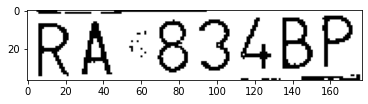

In [ ]:
siva = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

tresholding, thresh3 = cv2.threshold(siva, 25, 255,cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thresh3, cv2.COLOR_BGR2RGB))

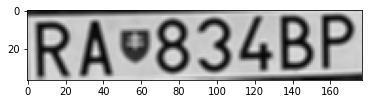

In [ ]:
siva1 = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

blur2 = cv2.blur(siva1,(3,3),cv2.BORDER_DEFAULT)
plt.imshow(cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB))

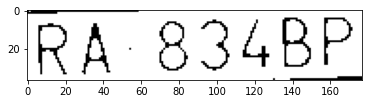

In [ ]:
siva = cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB)

tresholding, thresh2 = cv2.threshold(siva, 35, 255,cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thresh2, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['sk'])
result = reader.readtext(thresh2)

result


[([[1, 0], [177, 0], [177, 37], [1, 37]], 'RA  834BP', 0.8617581887376556)]

RA  834BP


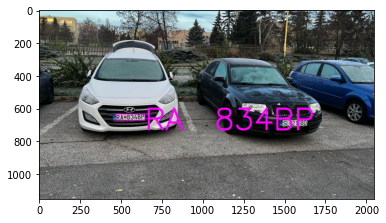

In [ ]:
text = result[0][-2]
print(text)


font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=6, color=(255,0,255), thickness=12, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (255,0,255),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))